# Least square regression (kenrel regressor)

This notebook trains and evaluates a random Fourier feature based kernel regressor model (RFFRegressor) on the artificial data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Import rfflearn.
import rfflearn.cpu as rfflearn

# If you want to enable GPU, please import rfflearn like the following instead.
#import rfflearn.gpu as rfflearn

## Generate artificial data

Generate artificial data and plot it.

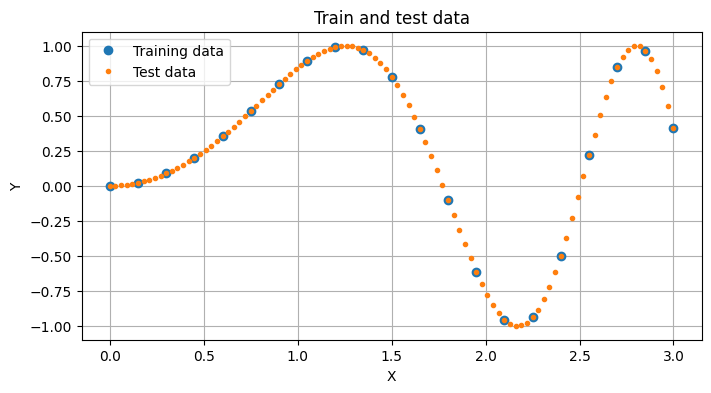

In [2]:
# Define the number of samples.
n_train = 21
n_test  = 101

# Generate data.
Xs_train = np.linspace(0, 3, n_train).reshape((n_train, 1))
ys_train = np.sin(Xs_train**2)
Xs_test  = np.linspace(0, 3, n_test).reshape((n_test, 1))
ys_test  = np.sin(Xs_test**2)

# Plot the data.
plt.figure(figsize=(8, 4))
plt.title("Train and test data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(Xs_train, ys_train, "o", label="Training data")
plt.plot(Xs_test,  ys_test,  ".", label="Test data")
plt.legend()
plt.grid(True)
plt.show()

## Train and evaluate a regressor model

### Instanciate regressor model

Instanciate one of the following regressor model:

* `RFFRegressor`: Kernel regressor with random Fourier features.
* `ORFRegressor`: Similar to RFFRegressor, but orthogonal random features are used.
* `QRFRegressor`: Similar to RFFRegressor, but quasi-random numbers are used.

In [3]:
# Kernel regressor with random Fourier features.
reg = rfflearn.RFFRegressor(dim_kernel=8, std_kernel=1.0)

# Kernel regressor with orthogonal random features.
# reg = rfflearn.ORFRegressor(dim_kernel=32, std_kernel=5.0)

# Kernel regressor with quasi-random Fourier features.
# reg = rfflearn.QRFRegressor(dim_kernel=32, std_kernel=5.0)

### Train the model

In [4]:
%%time

rfflearn.seed(111)

reg.fit(Xs_train, ys_train)

CPU times: total: 0 ns
Wall time: 2 ms


### Evaluate on the data

In [5]:
predict = reg.predict(Xs_test)

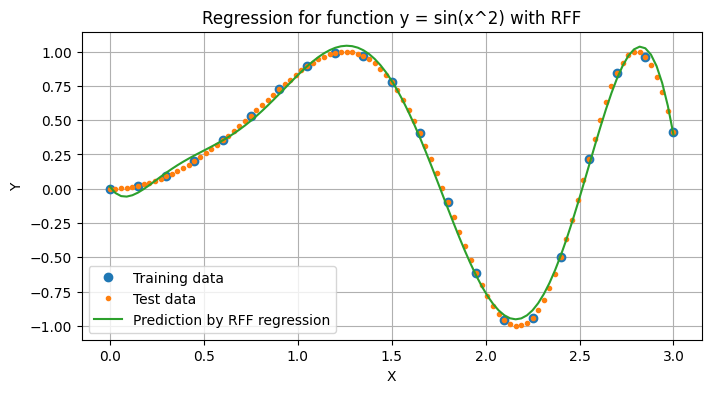

In [6]:
plt.figure(figsize=(8, 4))
plt.title("Regression for function y = sin(x^2) with RFF")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(Xs_train, ys_train, "o")
plt.plot(Xs_test,  ys_test,  ".")
plt.plot(Xs_test,  predict,  "-")
plt.legend(["Training data", "Test data", "Prediction by RFF regression"])
plt.grid(True)
plt.show()